<a href="https://colab.research.google.com/github/yuki-tamaribuchi/ml_code_kata/blob/master/mnist_cnn_128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [16]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

X_train,X_test=np.divide(X_train,255.0),np.divide(X_test,255.0)

y_train,y_test=np.asarray(y_train).astype('float32').reshape((-1,1)),np.asarray(y_test).astype('float32').reshape((-1,1))
y_train,y_test=tf.one_hot(y_train,10),tf.one_hot(y_test,10)
y_train,y_test=np.array(y_train),np.array(y_test)
y_train,y_test=y_train.reshape(-1,10),y_test.reshape(-1,10)

In [17]:
X_train,X_test=X_train.reshape(-1,28,28,1),X_test.reshape(-1,28,28,1)

In [18]:
model=Sequential(
    name='model_mnist'
)

model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

model.build(input_shape=X_train.shape)

In [19]:
model.summary()

Model: "model_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (60000, 28, 28, 128)      1280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (60000, 14, 14, 128)      0         
_________________________________________________________________
flatten_3 (Flatten)          (60000, 25088)            0         
_________________________________________________________________
dense_3 (Dense)              (60000, 10)               250890    
Total params: 252,170
Trainable params: 252,170
Non-trainable params: 0
_________________________________________________________________


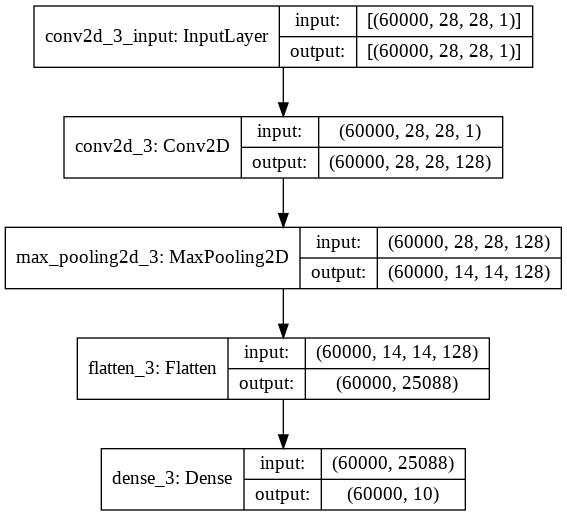

In [20]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [21]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
model.fit(X_train,y_train,batch_size=128,epochs=5)

Epoch 1/5
469/469 [==============================] - 57s 121ms/step - loss: 0.4861 - accuracy: 0.8753
Epoch 2/5
469/469 [==============================] - 56s 120ms/step - loss: 0.0817 - accuracy: 0.9773
Epoch 3/5
469/469 [==============================] - 56s 120ms/step - loss: 0.0594 - accuracy: 0.9820
Epoch 4/5
469/469 [==============================] - 56s 119ms/step - loss: 0.0495 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 56s 119ms/step - loss: 0.0433 - accuracy: 0.9869


In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0541 - accuracy: 0.9826


[0.05412646383047104, 0.9825999736785889]